In [1]:
from astropy import units as u
import numpy as np
from cmdstanpy import CmdStanModel
import arviz, corner

import sys
sys.path.append("../../")
from nu_stats.simulation import Simulation


In [2]:
# Choose simulation parameters
L = 1e48 * (u.erg/u.s)
gamma = 2.2
z = 0.3
F_diff_norm = 1e-16 * 1/(u.GeV * u.cm**2 * u.s)
Emin = 1e5 * u.GeV
Emax = 1e8 * u.GeV
Enorm = 1e5 * u.GeV

In [3]:
sim = Simulation(L, gamma, z, F_diff_norm, Emin, Emax, Enorm)
sim.run(seed=42)


Simulating 39 events...
Done!


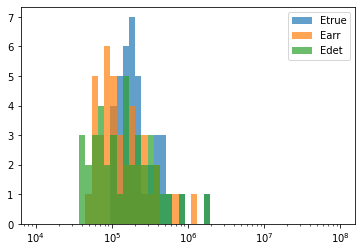

In [4]:
sim.show_spectrum()

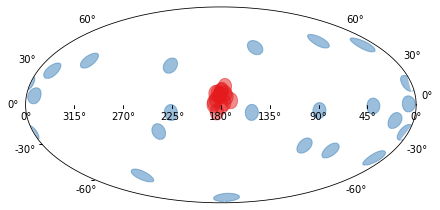

In [5]:
sim.show_skymap()

In [6]:
# Extract simulated data and get info needed for fit
fit_input = sim.get_fit_input()

In [7]:
stan_model = CmdStanModel(stan_file="stan/toy_bhm.stan")
fit = stan_model.sample(data=fit_input, iter_sampling=1000, chains=4, seed=42)

INFO:cmdstanpy:compiling stan program, exe file: /mnt/c/Users/minoz/nu_stats/examples/bayes_hierarchical_model/stan/toy_bhm
INFO:cmdstanpy:compiler options: stanc_options={'include_paths': ['/mnt/c/Users/minoz/nu_stats/examples/bayes_hierarchical_model/stan']}, cpp_options=None
INFO:cmdstanpy:compiled model file: /mnt/c/Users/minoz/nu_stats/examples/bayes_hierarchical_model/stan/toy_bhm
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


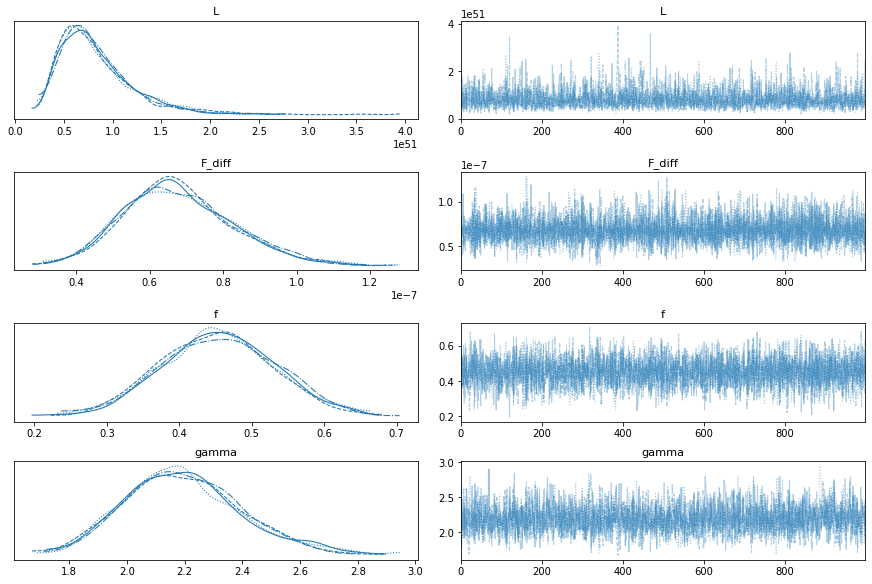

In [8]:
# Trace plot
var_names = ["L", "F_diff", "f", "gamma"]
arviz.plot_trace(fit, var_names=var_names);


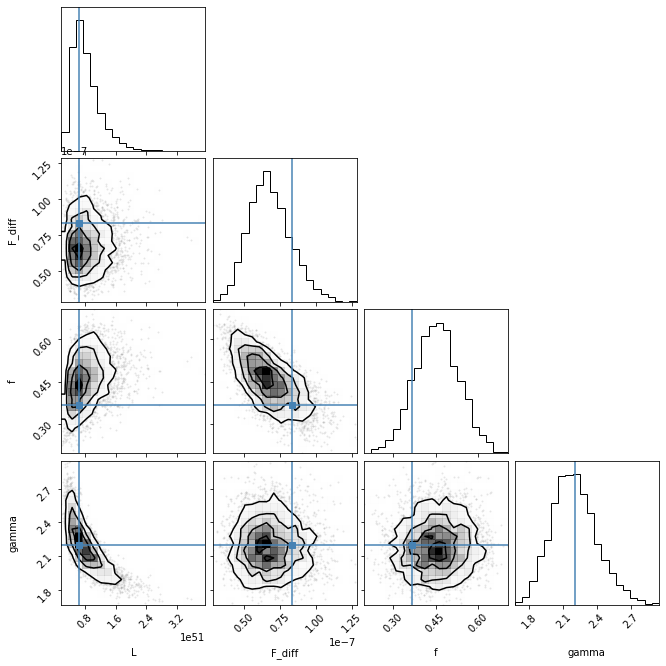

In [9]:
# Corner plot, comparing with truth form sim
chain = fit.stan_variables()
samples = np.column_stack([chain[key].values.T[0] for key in var_names])
truths_list = [sim.truth[key] for key in var_names]

corner.corner(samples, labels=var_names, truths=truths_list);